# Understanding Decision Boundaries for Machine Learning Algorithms

In my [last project](https://github.com/mwtichen/Circle-Classification) I learned which machine learning algorithms performed best when classifying data points from Sci-Kit Learn's circle dataset generator.

In this project, I'm taking another look at this task. I'll be making plots of the decision boundaries and hopefully figuring out why some machine learning algorithms perform better than others.

## Generating the Data

I'll start by generating the circles dataset again, using the [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) function.

Here are some imporant parameters for this function:

* n_samples = the number of samples to generate
* noise = the standard deviation of the white noise added to the data
* random_state = the seed used for white noise generation
* factor = the scale factor between inner and outter circle.

Note: A smaller scale factor increases the distance between the inner and outter circle.

In [1]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=5000, noise = 0.1, random_state = 33, factor = 0.15)

## Plotting Decision Boundaries

I'll be looking at the same models as the last project. My list of models includes:

* Logistic Regression
* Naive Bayes
* KNearest Neighbors
* Support Vector Machines
* Decision Trees
* Random Forest
* Gradient Boosted Trees
* Multi-layer Perceptron, i.e. Neural Network

To make the plots, I'm going to import the tools I need and set matplotlib to make plots inline with the notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

## Logistic Regression

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model, assuming that the dependent variable, Y, is binomially distributed with a mean equal to a linear combination of the independent variables. The probability that Y takes on a value is the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) applied to a linear combination of independent variables and coefficients, that is  $$Pr(Y=1) = \frac 1{1  + e^{-X^T\beta}}$$.

To determine which binary class to choose, the model (by default) uses 0.5 as a cut-off score. So if $\frac 1{1+e^{-x^T\beta}} >= 0.5$, then the model predicts $y=1$, otherwise the model predicts $y=0$.

Let's see the decision boundary.

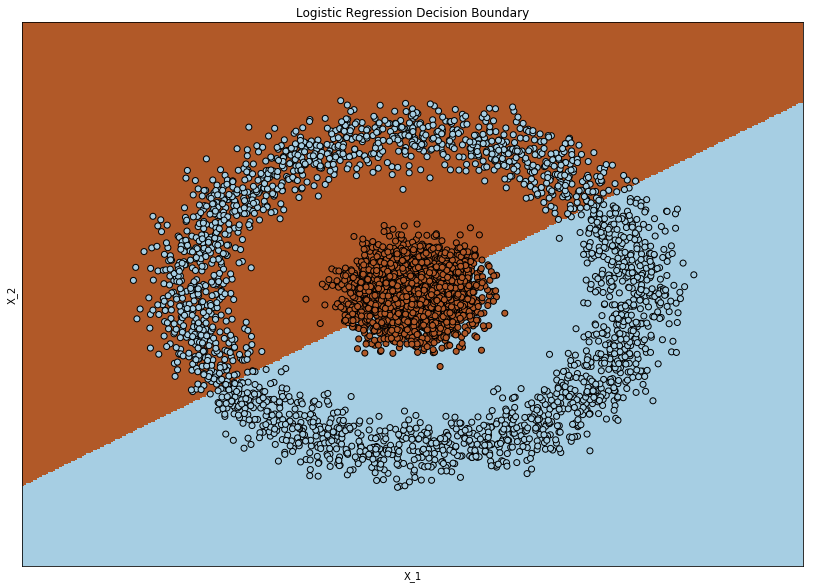

In [3]:
model = LogisticRegression(random_state = 33)
model.fit(X,y)

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Logistic Regression Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

What the hell just happened???

It may come as a surprise to some (it was a surprise to me when I learned this) that Logistic Regression is [linear classifier](https://en.wikipedia.org/wiki/Linear_classifier). The model is literally drawing a straight line through the data points and classifying points based on which side of the line they're on.

But, but... what about the logistic function. Isn't that non-linear?

Yes, but when you pick a cut-off point you have $$\hat{y} = 1 \iff \frac 1{1+e^{-X^T\beta}} >= \frac 12 \iff 1 >= \frac {1+e^{-X^T\beta}}{2} \iff 1 >= e^{-X^T\beta}$$ $$ \iff ln(1) >= -X^T\beta \iff X^T\beta >= 0$$.

So you can see that the decision is whether the point on a line (in our case a plane) is greater than or equal to 0. Hence, it's a *linear* classifier. Enough said.

## Naive Bayes

[Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) is another statistical model, that 'naively' makes a strong assumption about the independence of the independent variables. In naive bayes, the probability of a certain class given the data is the product of the probability of that class and the probability of the indepndent variable given the class, for each independent variable, that is $$P(Y = y|X) = P(Y = y) \cdot P(X_1 = x_1|Y=y) \cdot P(X_2 = x_2|Y=y) \cdot... \cdot P(X_p=x_p|Y=y)$$.

The [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) function assumes that each independent variable, given a class, is normally distributed, that is $P(X_i = x_i | Y = y) \sim N(\mu_y, \sigma_y^2)$.

Let's see the decision boundary.

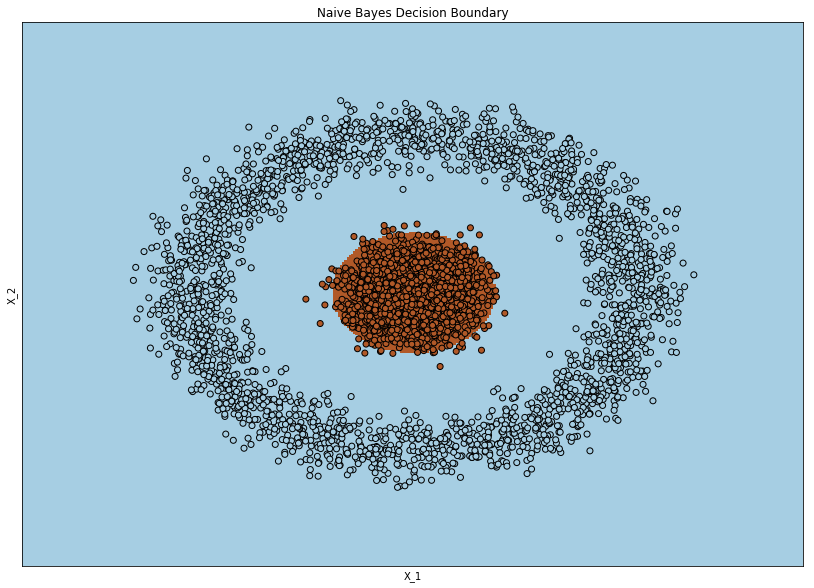

In [4]:
model = GaussianNB()
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Naive Bayes Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

That's interesting. Naive Bayes seems to classify all points likely to be in some bivariate distribution with mean 0.

You can plenty of brown circles in the outter blue area, so it hasn't quite perfected the decision boundary.

With less noise, this model would perform better.

## K-Nearest Neighbors

[K Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is an incredibly simple algorithm for making predictions. In K Nearest Neighbors, the most common class of the K nearest observations in the training data is used to make a prediction.

The [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) has 5 as the default value for K, and uses the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) to determine which points are nearest.

Let's see the decision boundary.

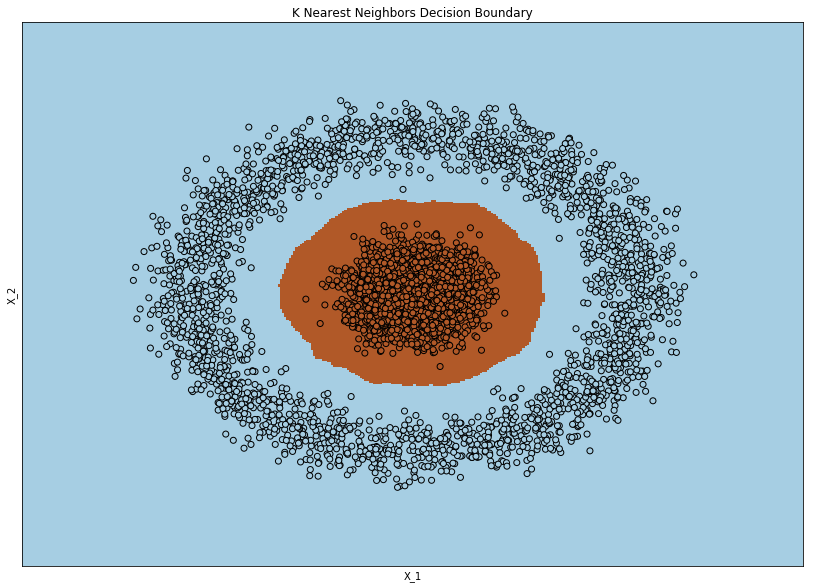

In [5]:
model = KNeighborsClassifier()
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('K Nearest Neighbors Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

We can see this circular blob that is the decision boundary, accurately dividing orange from blue points.

K-Nearest Neighbors is using random noise to make the decision boundary.

I'm not going to go to deep in this project, but you can read the [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) to see how your choice of K affects the decision boundary.

## Support Vector Machine

The [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine) algorithm finds the linear combination of independent variables and weights that separate the dataset into hyperplanes with the widest margin between the classes. To handle non-linearity a [kernel](https://en.wikipedia.org/wiki/Kernel_method) function can be used to transform the feature space and make better predictions.

By default, the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) uses a [radial-basis kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) function.

Let's see the decision boundary.

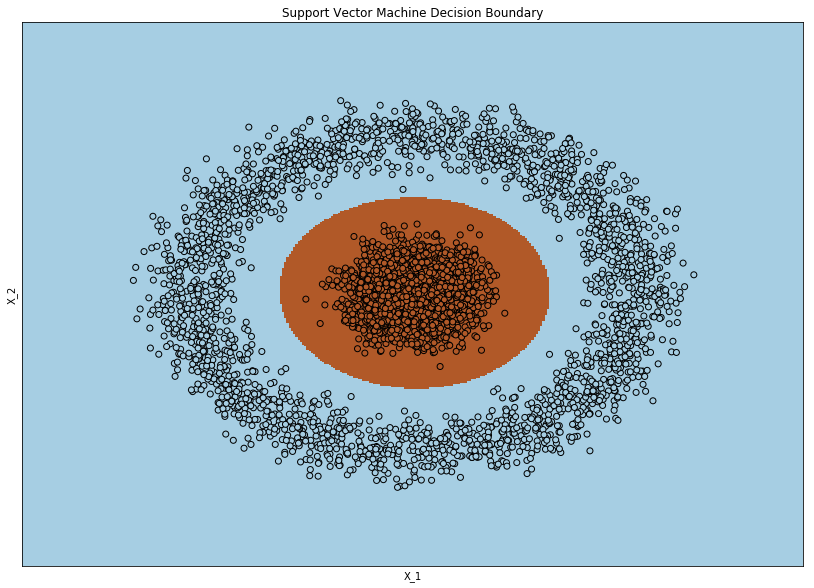

In [6]:
model = SVC()
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Support Vector Machine Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

Ah, Support Vector Machine. How I don't understand you. Sigh...

Theoretically, the input space, i.e. the $x_1$s and $x_2$s, are mapped to an **infinite** dimensional input space, where non-linearities can be handled easily. 

We don't have to do the mapping (how the heck would you map something to an infnite dimensional space?), because of the [kernel trick](https://en.wikipedia.org/wiki/Support-vector_machine#Kernel_trick). We only need to compute a dot-product when making new predictions, so $$\hat{y} = sign(\sum_{i=1}^n y_i \cdot \alpha_i \cdot K(x_i,x) + \rho)$$. 

If this conversation went over your head, don't worry. The math behind this often goes over mine as well.

## Decision Tree

The [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree) is a greedy algorithm that finds the variable and value that best splits the dataset in two, then splits the dataset and repeats until there are no more observations to split on or the tree has reached a maximum depth (or perhaps some other stopping condition).

By default, the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) function uses [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) to find the best variable and value to split on.

Let's check out the decision tree's decision boundary.

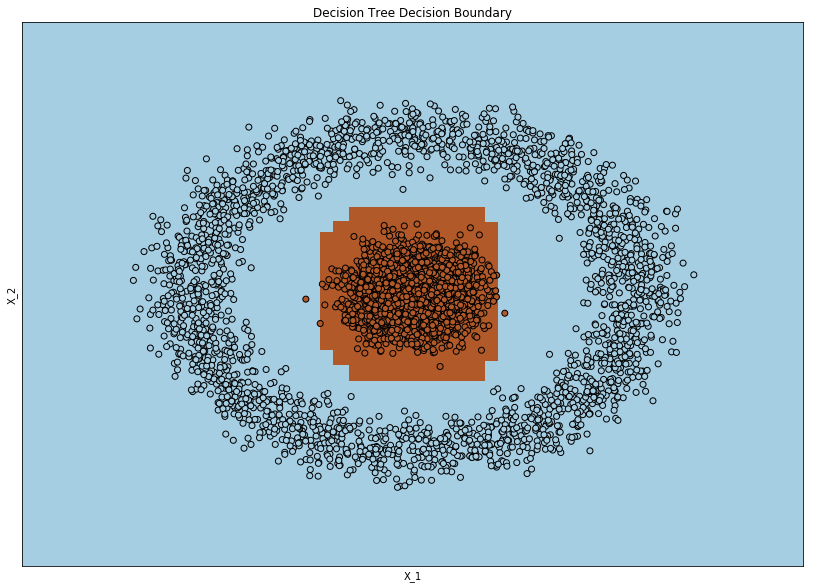

In [7]:
model = DecisionTreeClassifier()
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Decision Tree Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

Finally, something simple again.

The decision tree algorithm divides the input space into rectangular regions.

In the plot above we can see exactly this, and, just like forcing a square peg through a round circle, the decision tree model misclassifies a couple of points.

Still, the decision tree handles non-linearity fairly well compared to linear classifiers like logistic regression.

## Random Forest

The [Random Forest](https://en.wikipedia.org/wiki/Random_forest) algorithm makes predictions with a majority vote from a collection of decision trees. To make sure that the decision trees aren't all the same, Random Forest samples the entire dataset with replacement each time a tree is grown. For even more variation, Random Forest also randomly selects independent variables when each tree is searching for the best variable and value to split on.

Let's see Random Forest's decision boundary.

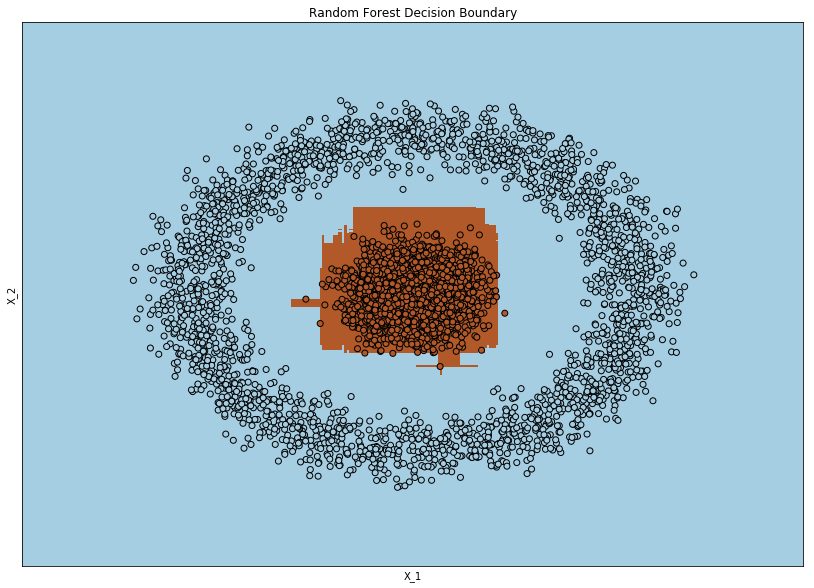

In [8]:
model = RandomForestClassifier(random_state=33)
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Random Forest Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

How do we explain this? Well, it's combining decision boundaries from a collection of 100 decision trees by voting.

Imagine that each decision tree makes a brown rectangular region on a blue sheet of paper, where the whole sheet is like a nearly transparent film. Now, taking 100 of these thin sheets and stack them on top of each other. When colors overlap, take the mostly blue regions and make them solid blue and take the mostly brown regions and make them solid brown. Doing this, you should see something like the plot above.

## Gradient Boosted Trees

[Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting) is a method for building a strong classifier from a series of weak classifiers. In gradient boosting, each additional classifier is fit to the model's _pseudo residuals_, then weighted and summed with the model's previous weak learners. Of course, I'm abstracting away and ignoring several key details.

Using Scikit-Learn's [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier), let's see the decision boundary for one version of this model.

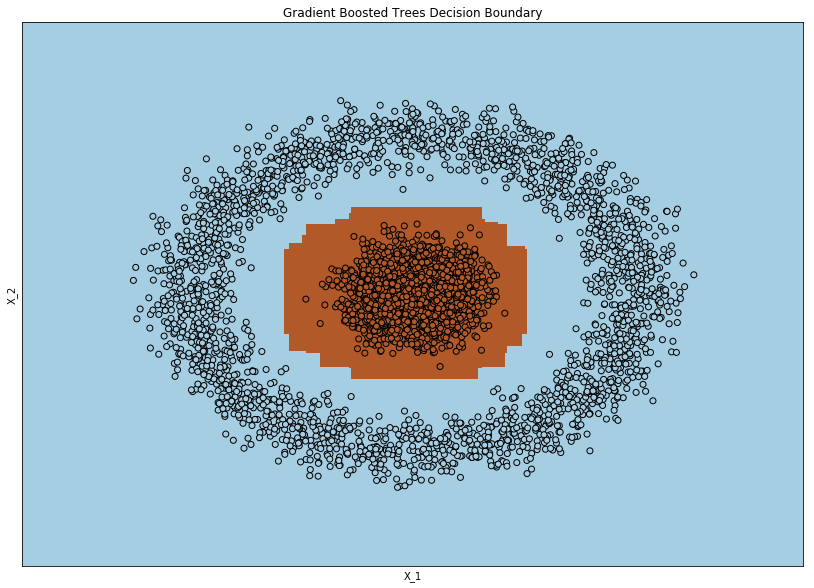

In [9]:
model = GradientBoostingClassifier(random_state=33)
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Gradient Boosted Trees Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

Unlike Random Forest, the Gradient Boosted is adding up predictions, rather than voting, that is $$\hat{y} = sign(\sum_{i=1}^n \alpha_i H_i(x))$$.

We can see that the decision boundary is still a bunch of rectangular regions, except this time the regions are very fine-grained.

## Neural Network

The [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network) model is also called the Multi-Layer Perceptron. Multi-Layer Perceptron, as the name implies, is composed of layers of the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) models. The analogy here is that the Perceptrons are like individual neurons in the brain, which is the Artificial Neural Network.

Let's see how Scikit-Learn's [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) makes a decision boundary with two hidden layers of size 8 and 4, and rectified linear unit (ReLU)  [activation function](https://en.wikipedia.org/wiki/Activation_function).

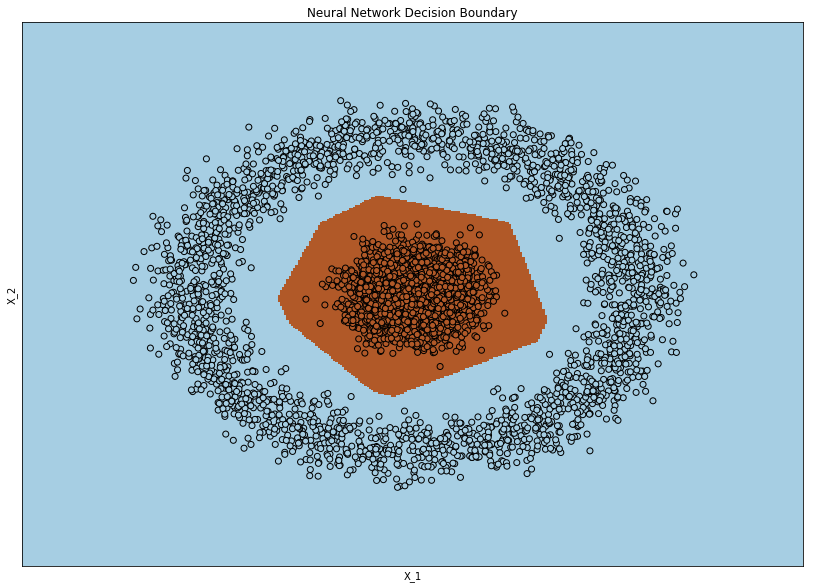

In [10]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (8,4), random_state = 33, max_iter = 1000)
model.fit(X,y)
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (14,10))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Neural Network Decision Boundary')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

Uh, uh... it made a hexagon.

Yeah, I have no clue why it did this. I can tell you how the Artifical Neural Network makes a decision though. 

At each node the output is $\sigma(z^T\beta)$, where $\sigma$ is the activation function, $Z$ is just a vector of inputs and $\beta$ are coefficients or weights in the dot product. The Artificial Neural Network arranges the nodes into layers, so that in the first layer the input is the vector $x$, whose output is the input for a node in the next layer. Each node in one layer of the Artificial Neural Network feeds input to *every* node in the next layer.

In this example, there were two hidden layers with 8 and 4 nodes respectively, and in Sci-kit Learn's MLPClassifier, every node has the same activation function, which is ReLU in this case.

## Conclusion

In this project I found that:

* Logistic Regression makes a straight-line (plane or hyper-plane) for a decision boundary.
* Naive Bayes seems to use areas of probability density when making decision regions.
* Support Vector Machines can make spherical regions, when using the radial basis kernel.
* Tree algorithms divide the input space into rectangular regions.
* Neural Networks make complex decision boundaries.

As always, thanks for reading.